In [5]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

# Actividad 03: Errores

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---

# 1
La serie de Taylor para la función seno ($\sin(x)$) centrada en $a=0$ (también conocida como la serie de Maclaurin) se expresa de la siguiente manera:

> Añadir blockquote



$$\sin(x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!} x^{2n+1} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots$$

* Encontrar la aproximación para $x = \pi/4$ cambiando el valor de tolerancia, ¿Qué puede concluir de la serie?
* Hallar el error relativo y porcentual.
* Grafique los valores asociados a la serie después de cada iteración.
* Repita para la serie:
$$\ln(1+x) = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}}{n} x^n$$


 Aproximación con tolerancia = 0.001
Aproximación: 0.7071064695751781
Error relativo: 4.406850247592559e-07
Error porcentual: 0.00004%

 Aproximación con tolerancia = 1e-05
Aproximación: 0.7071067829368671
Error relativo: 2.4753258115344967e-09
Error porcentual: 0.00000%

 Aproximación con tolerancia = 1e-08
Aproximación: 0.7071067811796194
Error relativo: 9.797690960678494e-12
Error porcentual: 0.00000%

 Aproximación con tolerancia = 1e-10
Aproximación: 0.7071067811865679
Error relativo: 2.888970123978146e-14
Error porcentual: 0.00000%


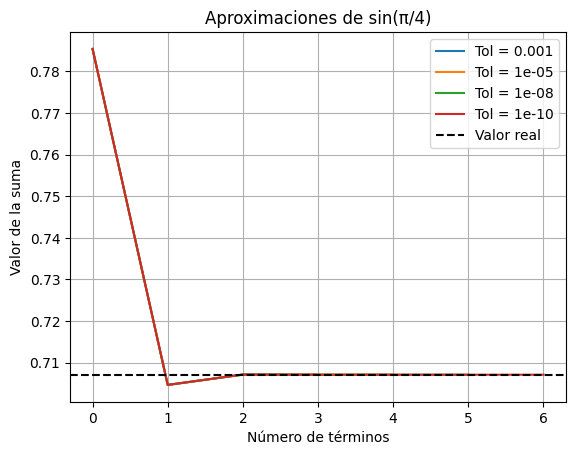

In [8]:
import math
import matplotlib.pyplot as plt

x = math.pi / 4
valor_real = math.sin(x)

def aproximar_seno(x, tolerancia):
    '''
    Aproxima el valor de sin(x) usando la serie de Taylor
    '''
    suma = 0
    n = 0
    termino = x  # Primer término
    errores = []
    aproximaciones = []

    while abs(termino) > tolerancia:
        termino = ((-1) ** n) * (x ** (2 * n + 1)) / math.factorial(2 * n + 1)
        suma += termino
        aproximaciones.append(suma)
        error_relativo = abs((valor_real - suma) / valor_real)
        errores.append(error_relativo)
        n += 1

    # Error final
    error_relativo_final = abs((valor_real - suma) / valor_real)
    error_porcentual = error_relativo_final * 100

    return suma, error_relativo_final, error_porcentual, aproximaciones, errores

tolerancias = [1e-3, 1e-5, 1e-8, 1e-10]

for tol in tolerancias:
    print(f"\n Aproximación con tolerancia = {tol}")
    aprox, err_rel, err_pct, aproximaciones, errores = aproximar_seno(x, tol)
    print(f"Aproximación: {aprox}")
    print(f"Error relativo: {err_rel}")
    print(f"Error porcentual: {err_pct:.5f}%")

    plt.plot(aproximaciones, label=f"Tol = {tol}")

plt.axhline(y=valor_real, color='black', linestyle='--', label='Valor real')
plt.title("Aproximaciones de sin(π/4)")
plt.xlabel("Número de términos")
plt.ylabel("Valor de la suma")
plt.legend()
plt.grid()
plt.show()


# 2

La serie de Taylor para la función $(1+x)^\alpha$, conocida como la **serie binomial**, centrada en $a=0$ está dada por:

$$(1+x)^\alpha = \sum_{n=0}^{\infty} \binom{\alpha}{n} x^n = 1 + \alpha x + \frac{\alpha(\alpha-1)}{2!} x^2 + \frac{\alpha(\alpha-1)(\alpha-2)}{3!} x^3 + \cdots$$

donde $\binom{\alpha}{n}$ es el coeficiente binomial generalizado.

Considere el caso donde $\alpha = 1/2$, lo que nos da la serie de Taylor para $\sqrt{1+x}$:

$$\sqrt{1+x} = \sum_{n=0}^{\infty} \binom{1/2}{n} x^n = 1 + \frac{1}{2} x - \frac{1}{8} x^2 + \frac{1}{16} x^3 - \frac{5}{128} x^4 + \cdots$$

a.  **Encontrar la aproximación para $x = 0.5$** cambiando el número de términos incluidos en la suma. ¿Qué puedes concluir sobre la convergencia de la serie para este valor de $x$?

b.  **Hallar el error relativo y porcentual** para cada aproximación, utilizando el valor real de $\sqrt{1+0.5} = \sqrt{1.5} \approx 1.224744871$.


c.  **Grafique los valores asociados a la serie después de cada iteración.** Muestra cómo la serie se acerca al valor real a medida que se incluyen más términos.

d. **Utilizando el criterio de tolerancia, evalue 6 a 7 valores diferentes**, y encuentre cuántos términos son necesarios para alcanzar dicha resolución. Realice un gráfico de la evolución del sistema.



Valor real: 1.224744871391589

 Tolerancia: 0.1
Aproximación: 1.21875
Valor real:     1.224744871391589
Error relativo: 0.00489479199433381
Error %:        0.48948%
Número de términos necesarios: 3

 Tolerancia: 0.01
Aproximación: 1.2265625
Valor real:     1.224744871391589
Error relativo: 0.0014840875441640507
Error %:        0.14841%
Número de términos necesarios: 4

 Tolerancia: 0.0001
Aproximación: 1.2247298955917358
Valor real:     1.224744871391589
Error relativo: 1.2227689376714766e-05
Error %:        0.00122%
Número de términos necesarios: 9

 Tolerancia: 1e-06
Aproximación: 1.2247451045404887
Valor real:     1.224744871391589
Error relativo: 1.903652794864201e-07
Error %:        0.00002%
Número de términos necesarios: 14

 Tolerancia: 1e-08
Aproximación: 1.224744873486003
Valor real:     1.224744871391589
Error relativo: 1.7100818501116435e-09
Error %:        0.00000%
Número de términos necesarios: 20

 Tolerancia: 1e-10
Aproximación: 1.2247448714134477
Valor real:     1.22474

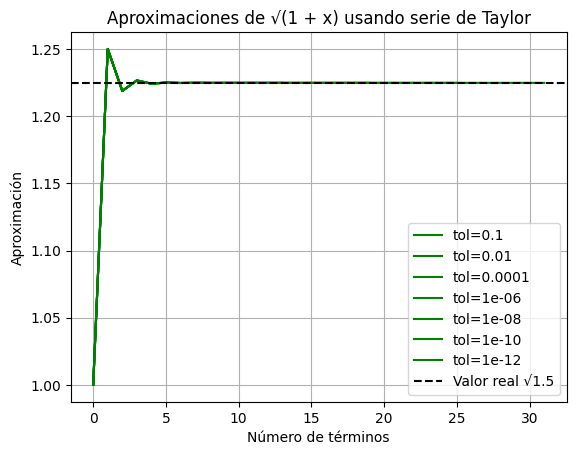

In [21]:
import math
import matplotlib.pyplot as plt

def binomio_general(alpha, n):
    '''
    Calcula el coeficiente binomial generalizado
    '''
    coeficiente = 1
    for k in range(n):
        coeficiente *= (alpha - k)
    return coeficiente / math.factorial(n)

def taylor(x, alpha, tolerancia):
    '''
    Aproxima el valor de sqrt(1 + x) usando la serie de Taylor
    '''
    suma = 0
    termino = 1  # primer término
    n = 0

    aproximaciones = []
    errores = []

    valor_real = math.sqrt(1 + x)

    while abs(termino) > tolerancia:
        coeficiente = binomio_general(alpha, n)
        termino = coeficiente * (x ** n)
        suma += termino

        aproximaciones.append(suma)
        error_relativo = abs((valor_real - suma) / valor_real)
        errores.append(error_relativo)

        n += 1

    error_relativo_final = abs((valor_real - suma) / valor_real)
    error_porcentual = error_relativo_final * 100

    return suma, error_relativo_final, error_porcentual, aproximaciones, errores, n

# Evaluar para x = 0.5
x = 0.5
alpha = 1/2
valor_real = math.sqrt(1 + x)
print(f"Valor real: {valor_real}")


#tolerancias
tolerancias = [1e-1, 1e-2, 1e-4, 1e-6, 1e-8, 1e-10, 1e-12]

for tol in tolerancias:
    print(f"\n Tolerancia: {tol}")
    aprox, err_rel, err_pct, aproximaciones, errores, num_terminos = taylor(x, alpha, tol)
    print(f"Aproximación: {aprox}")
    print(f"Valor real:     {valor_real}")
    print(f"Error relativo: {err_rel}")
    print(f"Error %:        {err_pct:.5f}%")
    print(f"Número de términos necesarios: {num_terminos}")
    plt.plot(aproximaciones, 'g', label=f"tol={tol}")

plt.axhline(y=valor_real, color='black', linestyle='--', label="Valor real √1.5")
plt.title("Aproximaciones de √(1 + x) usando serie de Taylor")
plt.xlabel("Número de términos")
plt.ylabel("Aproximación")
plt.legend()
plt.grid()
plt.show()
